In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = keras.datasets.mnist.load_data()

In [3]:
(train_images, train_labels), (test_images, test_labels) = data
train_images.shape

(60000, 28, 28)

In [4]:
labels = np.unique(train_labels)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


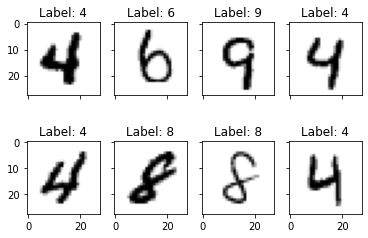

In [5]:
nrows = 2
ncols = 4
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
    for col in range(ncols):
        rand_example = np.random.choice(len(train_images))
        ax[row,col].imshow(train_images[rand_example].reshape((28,28)), cmap='gray_r')
        ax[row,col].set_title("Label: {}".format(train_labels[rand_example]))

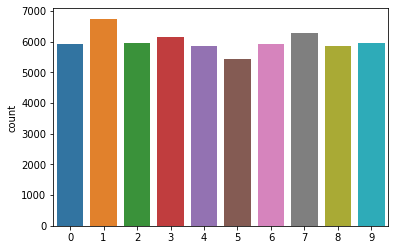

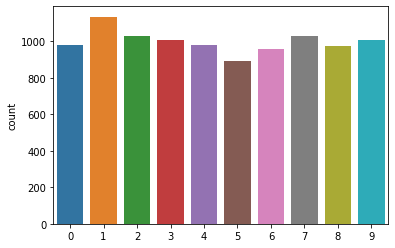

In [6]:
sns.countplot(x=train_labels)
plt.show()
sns.countplot(x=test_labels)
plt.show()

In [7]:
from tensorflow.keras.utils import to_categorical
# Encode labels to one hot vectors
label_vectors = to_categorical(labels)
print(label_vectors[3])

# Normalize between 0 and 1 the data (The pixel-value is an integer between 0 and 255)
print('test_images before', test_images[0][15])
test_images = test_images / 255.0
print('test_images after', test_images[0][15])

train_images = train_images / 255.0

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
test_images before [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 133 254
 187   5   0   0   0   0   0   0   0   0]
test_images after [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.52156863 0.99607843
 0.73333333 0.01960784 0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer
    keras.layers.Dense(128, activation='relu'),  # hidden layer (1)
    keras.layers.Dense(10, activation='softmax') # output layer
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_images, train_labels, batch_size = 100, epochs = 8, 
          validation_data = (test_images, test_labels), verbose = 1)

Epoch 1/8
600/600 [==============================] - 1s 2ms/step - loss: 0.3416 - accuracy: 0.9038 - val_loss: 0.1913 - val_accuracy: 0.9429
Epoch 2/8
600/600 [==============================] - 1s 1ms/step - loss: 0.1566 - accuracy: 0.9554 - val_loss: 0.1294 - val_accuracy: 0.9632
Epoch 3/8
600/600 [==============================] - 1s 1ms/step - loss: 0.1103 - accuracy: 0.9679 - val_loss: 0.1064 - val_accuracy: 0.9676
Epoch 4/8
600/600 [==============================] - 1s 1ms/step - loss: 0.0846 - accuracy: 0.9757 - val_loss: 0.0933 - val_accuracy: 0.9715
Epoch 5/8
600/600 [==============================] - 1s 1ms/step - loss: 0.0672 - accuracy: 0.9803 - val_loss: 0.0933 - val_accuracy: 0.9702
Epoch 6/8
600/600 [==============================] - 1s 1ms/step - loss: 0.0552 - accuracy: 0.9841 - val_loss: 0.0803 - val_accuracy: 0.9755
Epoch 7/8
600/600 [==============================] - 1s 1ms/step - loss: 0.0454 - accuracy: 0.9867 - val_loss: 0.0762 - val_accuracy: 0.9771
Epoch 8/8
600

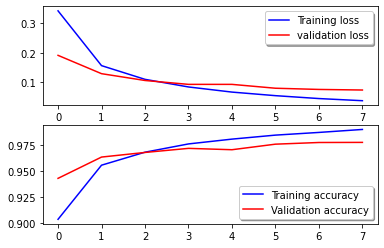

In [11]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
predictions = model.predict(train_images)

In [13]:
pos = 0
print(predictions[pos])
print('Predicted:', np.argmax(predictions[pos]))
print('Real label:', train_labels[pos])

[2.58433031e-09 9.29906605e-08 4.04196453e-06 1.04225101e-02
 4.45328453e-14 9.89572465e-01 2.33729187e-13 1.27498865e-08
 7.91035148e-09 8.52672599e-07]
Predicted: 5
Real label: 5


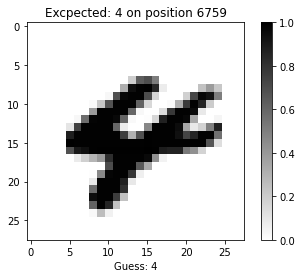

In [14]:
def show_image(img, label, guess, position):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title(f"Excpected: {label} on position {position}")
  plt.xlabel(f"Guess: {guess}")
  plt.colorbar()
  plt.show()

pos = np.random.choice(len(test_images))
image = test_images[pos]
prediction = model.predict(np.array([image]))

show_image(image, test_labels[pos], labels[np.argmax(prediction)], pos)